# 4.10 IC Coding Etiquette & Excel Reporting

# Contents

1. Import libraries and data exported from 4.9

2. Address security implications

3. Create a regional segmentation of the data
- 3.1. Set up region column
- 3.2. Create a crosstab to compare spending habits in different regions


4. Create an exclusion flag to exclude low-activity customers from the data

5. Create profiling variables
- 5.1. Age
- 5.2 Income
- 5.3 Number of Dependents

6. Visualizations to show distributions of profiles
- 6.1. Age Groups
- 6.2. Income Groups
- 6.3. Customers w/ Dependents

7. Aggregate max, min, & mean variables on customer-profile level for usage frequency and expenditure
- 7.1. Age Group
- 7.2. Income Group
- 7.3. Dependents Category


8. Compare customer profiles w/ regions & departments. Identify any links. Customers may demonstrate different behaviors across regions, which could make this information important.
- 8.1 Profile by Region
- 8.2 Profile by Department Sales

9. Visualizations

10. Export Final Data Set

# 1. Import libraries and data exported from 4.9

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import os

In [5]:
# Set path
path = r"C:\Users\tiffk\Instacart Basket Analysis 22-05-2024"

In [6]:
# Import data
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

# 2. Address security implications

In [7]:
#  Display DataFrame columns
pd.options.display.max_columns = None

In [8]:
# Check data
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,merge_1,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_product_price,spending_flag,median_days_between_orders,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,merge_2
0,196,Soda,77,7,9.0,2539329,1,1,2,8,NaN,True,1,0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,12427,Original Beef Jerky,23,19,4.4,2539329,1,1,2,8,NaN,True,3,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,2539329,1,1,2,8,NaN,True,2,0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,26088,Aged White Cheddar Popcorn,23,19,4.7,2539329,1,1,2,8,NaN,True,4,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,26405,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,2539329,1,1,2,8,NaN,True,5,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


All of the personally identifiable information (PII) not needed for analysis has been removed. No other columns need to be removed as for as privacy is concerned.

# 3. Create a regional segmentation of the data

## 3.1. Set up region column:

In [9]:
# Create Region column - organize by state and region
northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont' ]

In [10]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [11]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [12]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
# Create region columns
ords_prods_all.loc[ords_prods_all['state'].isin(northeast_region), 'region'] = 'Northeast'

In [14]:
ords_prods_all.loc[ords_prods_all['state'].isin(midwest_region), 'region'] = 'Midwest'

In [15]:
ords_prods_all.loc[ords_prods_all['state'].isin(south_region), 'region'] = 'South'

In [16]:
ords_prods_all.loc[ords_prods_all['state'].isin(west_region), 'region'] = 'West'

In [17]:
# Check data
ords_prods_all['region'].value_counts(dropna = False)

region
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

## 3.2. Create a crosstab to compare spending habits in different regions

In [18]:
# Create region_spending crosstab
region_spending_crosstab = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29265,7566800
Northeast,18639,5703253
South,40577,10749519
West,31238,8260441


The proportions between High Spender and Low Spender do not look to be substantially different between regions.



# 4. Create an exclusion flag for low-activity customers and export this sample.

In [19]:
# Exclude customers w/ max_order less than 5 
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [20]:
# Keep customers where max_order is greater than or equal to 5
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [21]:
# Check table
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,merge_1,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_product_price,spending_flag,median_days_between_orders,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,merge_2,region,exclusion_flag
0,196,Soda,77,7,9.0,2539329,1,1,2,8,NaN,True,1,0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
1,12427,Original Beef Jerky,23,19,4.4,2539329,1,1,2,8,NaN,True,3,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
2,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,2539329,1,1,2,8,NaN,True,2,0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
3,26088,Aged White Cheddar Popcorn,23,19,4.7,2539329,1,1,2,8,NaN,True,4,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
4,26405,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,2539329,1,1,2,8,NaN,True,5,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep


In [22]:
# Check frequencies
ords_prods_all['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30959687
Exclude     1440045
Name: count, dtype: int64

In [23]:
# Check exclusion flag using crosstab
exclusion_flag_check = pd.crosstab(ords_prods_all['exclusion_flag'], ords_prods_all['max_order'], dropna = False)

In [24]:
exclusion_flag_check.to_clipboard()

In [25]:
# Create sample without 'exclude' rows called ords_prods_in
ords_prods_all_in = ords_prods_all[ords_prods_all['exclusion_flag'] == 'Keep']

In [26]:
# Check sample
ords_prods_all_in.shape

(30959687, 34)

This dataset focuses on customers who are active

In [27]:
# Export Sample
ords_prods_all_in.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_in_sample.pkl'))

# 5. Create profiling variables

## 5.1. Age

The age categories are subjective, but based on standard ranges. Young adult =< 29, Adult 30 - 39, Middle Age 40 - 49, Senior 52 - 64, Elderly 65+

In [28]:
ords_prods_all_in.loc[ords_prods_all_in['age'] <= 29, 'age_group'] = 'Young Adult'

C:\Users\tiffk\AppData\Local\Temp\ipykernel_2748\891740858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_in.loc[ords_prods_all_in['age'] <= 29, 'age_group'] = 'Young Adult'


In [29]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 30) & 
                    (ords_prods_all_in['age'] < 40), 'age_group'] = 'Adult'

In [30]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 40) & 
                    (ords_prods_all_in['age'] < 50), 'age_group'] = 'Middle Age'

In [31]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 50) & 
                    (ords_prods_all_in['age'] < 65), 'age_group'] = 'Senior'

In [32]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 65), 'age_group'] = 'Elderly'

In [33]:
# Check frequency of age_group and ensure no NaNs
ords_prods_all_in['age_group'].value_counts(dropna = True)

age_group
Elderly        8194267
Senior         7219622
Young Adult    5816632
Middle Age     4882358
Adult          4846808
Name: count, dtype: int64

In [34]:
ords_prods_all_in.dropna()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,merge_1,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_product_price,spending_flag,median_days_between_orders,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,merge_2,region,exclusion_flag,age_group
5,196,Soda,77,7,9.0,2398795,1,2,3,7,15.0,False,1,1,both,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult
6,10258,Pistachios,117,19,3.0,2398795,1,2,3,7,15.0,False,2,0,both,Low-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult
7,12427,Original Beef Jerky,23,19,4.4,2398795,1,2,3,7,15.0,False,3,1,both,Low-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult
8,13032,Cinnamon Toast Crunch,121,14,4.0,2398795,1,2,3,7,15.0,False,6,0,both,Low-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult
9,13176,Bag of Organic Bananas,24,4,10.3,2398795,1,2,3,7,15.0,False,4,0,both,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399727,22920,Roasted & Salted Shelled Pistachios,117,19,1.7,2977660,206209,13,1,12,7.0,False,9,0,both,Low-range product,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,Keep,Elderly
32399728,24852,Banana,24,4,12.3,2977660,206209,13,1,12,7.0,False,1,1,both,Mid-range product,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,Keep,Elderly
32399729,31477,High Protein Bar Chunky Peanut Butter,3,19,4.2,2977660,206209,13,1,12,7.0,False,7,0,both,Low-range product,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,Keep,Elderly
32399730,38730,Brownie Crunch High Protein Bar,3,19,5.9,2977660,206209,13,1,12,7.0,False,6,0,both,Mid-range product,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,Keep,Elderly


### 5.2. Income

Categorize customers into income categories: low, middle, & high income groups based on standard considerations of US incomes. 

In [35]:
ords_prods_all_in.loc[ords_prods_all_in['income'] <= 50000, 'income_group'] = 'Low'

C:\Users\tiffk\AppData\Local\Temp\ipykernel_2748\3862173747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_in.loc[ords_prods_all_in['income'] <= 50000, 'income_group'] = 'Low'


In [36]:
ords_prods_all_in.loc[(ords_prods_all_in['income'] > 50000) & 
                    (ords_prods_all_in['income'] <= 100000), 'income_group'] = 'Middle'

In [37]:
ords_prods_all_in.loc[ords_prods_all_in['income'] > 100000, 'income_group'] = 'High'

In [38]:
# Check frequency of income_group and ensure no NaNs
ords_prods_all_in['income_group'].value_counts(dropna = False)

income_group
High      14202414
Middle    13394719
Low        3362554
Name: count, dtype: int64

### 5.3. Dependents

Divide data into customers with dependents and customers without dependents

In [39]:
ords_prods_all_in.loc[ords_prods_all_in['n_dependants'] == 0, 'dependents_flag'] = 'No Dependents'

C:\Users\tiffk\AppData\Local\Temp\ipykernel_2748\558603567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_in.loc[ords_prods_all_in['n_dependants'] == 0, 'dependents_flag'] = 'No Dependents'


In [40]:
# Ensure it is a copy
ords_prods_all_in = ords_prods_all_in.copy()

# Update 'dependents_flag' where 'n_dependants' is greater than 0
ords_prods_all_in.loc[ords_prods_all_in['n_dependants'] > 0, 'dependents_flag'] = 'Has Dependents'

# Update 'dependents_flag' where 'n_dependants' is 0
ords_prods_all_in.loc[ords_prods_all_in['n_dependants'] == 0, 'dependents_flag'] = 'No Dependents'


In [41]:
# Check data
ords_prods_all_in['dependents_flag'].value_counts(dropna = False)

dependents_flag
Has Dependents    23221179
No Dependents      7738508
Name: count, dtype: int64

# 6. Visualizations to show distributions of profiles

In [42]:
# Create a unique user_id sample and take relevant columns
user_sample = ords_prods_all_in[['user_id', 'age_group', 'income_group', 'dependents_flag', 'region', 'loyalty_flag']]

In [43]:
# Remove duplicate rows in the user_sample to obtain a sample of all unique customers
user_sample = user_sample.drop_duplicates()

In [44]:
# Check data
user_sample

,user_id,age_group,income_group,dependents_flag,region,loyalty_flag
0,1,Adult,Low,Has Dependents,South,New customer
59,2,Elderly,Middle,Has Dependents,West,Regular customer
254,3,Adult,Middle,Has Dependents,West,Regular customer
342,4,Adult,Low,Has Dependents,South,New customer
411,7,Adult,Middle,Has Dependents,Northeast,Regular customer
...,...,...,...,...,...,...
32398213,206203,Elderly,High,Has Dependents,South,New customer
32398418,206206,Young Adult,Middle,Has Dependents,West,Loyal customer
32398703,206207,Elderly,High,Has Dependents,Midwest,Regular customer
32398926,206208,Senior,High,Has Dependents,Midwest,Loyal customer


loyalty_flag = {'New': 1, 'Regular': 2, 'Loyal': 3}

## 6.1. Age Groups

In [45]:
    # Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [46]:
## Create age_group counts table
age_group_counts = user_sample['age_group'].value_counts()

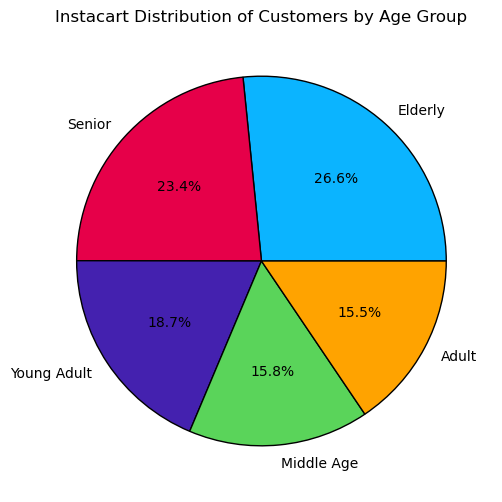

In [47]:
# Pie Chart
plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(age_group_counts, 
        labels = age_group_counts.index, 
        autopct='%.1f%%', # Show percentage to 1 d.p
        colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Instacart Distribution of Customers by Age Group') # title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save
plt.show()

## 6.2. Income Groups

In [48]:
## Create a table of income_group counts
income_group_counts = user_sample['income_group'].value_counts()

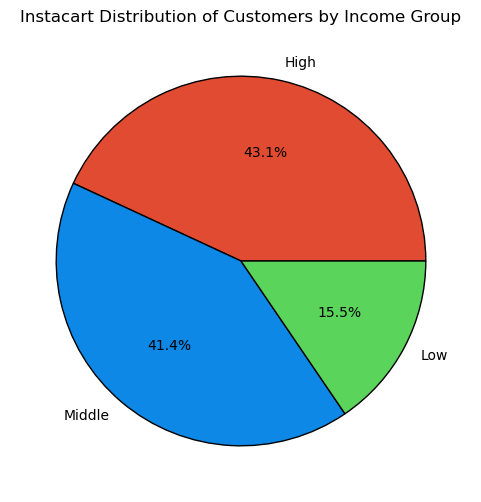

In [49]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_group_counts, 
        labels = income_group_counts.index, 
        autopct='%.1f%%',
        colors = ['#e14b31', '#0d88e6', '#5ad45a'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Distribution of Customers by Income Group')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_income_groups_pie.png'), bbox_inches = 'tight')
plt.show()

## 6.3. Dependents

In [50]:
# create a table of dependents_flag counts
dependents_flag_counts = user_sample['dependents_flag'].value_counts()

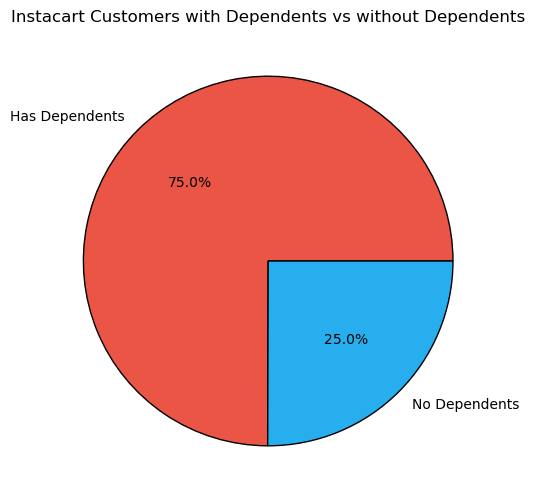

In [51]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(dependents_flag_counts, 
        labels = dependents_flag_counts.index, 
        autopct='%.1f%%', 
        colors = ['#ea5545', '#27aeef'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Customers with Dependents vs without Dependents')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependents_pie.png'), bbox_inches = 'tight')
plt.show()

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

Usage frequency is analyzed based on days since prior order & expenditure based on prices columns. For accuracy, aggregate the data from the ords_prods_all_in DataFrame so that each row represents a single order. This approach prevents averages from being skewed by customer orders comprising many items.

In [52]:
# An aggregated subset of data with 'prices' column as the total cost of each order:
orders_subset = ords_prods_all_in.groupby(['user_id', 'age_group', 'income_group', 'dependents_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [53]:
# Rename 'prices' to 'order_total'
orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [54]:
# Check subset
orders_subset

,user_id,age_group,income_group,dependents_flag,loyalty_flag,region,order_number,days_since_prior_order,order_total
0,1,Adult,Low,Has Dependents,New customer,South,2,15.0,35.4
1,1,Adult,Low,Has Dependents,New customer,South,3,21.0,28.2
2,1,Adult,Low,Has Dependents,New customer,South,4,29.0,26.0
3,1,Adult,Low,Has Dependents,New customer,South,5,28.0,57.0
4,1,Adult,Low,Has Dependents,New customer,South,6,19.0,25.0
...,...,...,...,...,...,...,...,...,...
2901732,206209,Elderly,High,Has Dependents,Regular customer,Midwest,9,22.0,26.2
2901733,206209,Elderly,High,Has Dependents,Regular customer,Midwest,10,29.0,64.7
2901734,206209,Elderly,High,Has Dependents,Regular customer,Midwest,11,30.0,56.1
2901735,206209,Elderly,High,Has Dependents,Regular customer,Midwest,12,18.0,131.5


## 7.1. Aggregations by Age Group

In [55]:
# max, min, mean by age category
aggregations_by_age_cat = orders_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_age_cat

days_since_prior_order                  order_total             \
                               min       mean   max         min       mean   
age_group                                                                    
Adult                          0.0  10.402160  30.0         1.0  79.135051   
Elderly                        0.0  10.372173  30.0         1.0  78.367220   
Middle Age                     0.0  10.370709  30.0         1.0  78.394398   
Senior                         0.0  10.387963  30.0         1.0  78.571168   
Young Adult                    0.0  10.401153  30.0         1.0  79.055388   

                     
                max  
age_group            
Adult         829.2  
Elderly       751.1  
Middle Age    758.7  
Senior       1092.2  
Young Adult   842.1

## 7.2. Aggregations by Income Group

In [56]:
# max, min, mean by age category
aggregations_by_income_cat = orders_subset.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_income_cat

days_since_prior_order                  order_total             \
                                min       mean   max         min       mean   
income_group                                                                  
High                            0.0  10.260991  30.0         1.0  83.757004   
Low                             0.0  11.070341  30.0         1.0  52.673028   
Middle                          0.0  10.289999  30.0         1.0  81.930075   

                      
                 max  
income_group          
High          1092.2  
Low            875.0  
Middle         852.5

Lower income customers spend less on average and shop very slightly less often

All age groups tend to shop and spend with similar frequency

##  7.3. Aggregations by Dependents Category


In [57]:
# max, min, mean by dependants category
aggregations_by_dependents_cat = orders_subset.groupby('dependents_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                               'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_dependents_cat

days_since_prior_order                  order_total  \
                                   min       mean   max         min   
dependents_flag                                                       
Has Dependents                     0.0  10.388232  30.0         1.0   
No Dependents                      0.0  10.378144  30.0         1.0   

                                    
                      mean     max  
dependents_flag                     
Has Dependents   78.728823  1092.2  
No Dependents    78.482647   875.0

Whether or not a customer has dependents doesn't seem to make a substantial difference to shopping or spending

# 8. Compare customer profiles with regions and departments and identify any links? 

The behaviors to be examined include frequency/loyalty, product_prices, and order_totals. Customer profile variables to be compared across regions and department sales

In [58]:
# Get names of each department back into the data
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [59]:
df_dep

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [60]:
# Transpose:
df_dep_t = df_dep.T

In [61]:
# Create index
df_dep_t.reset_index(inplace = True)

In [62]:
# Copy row 0 into variable
new_header = df_dep_t.iloc[0]

In [63]:
# Remove row 0
df_dep_t = df_dep_t[1:]

In [64]:
# Assign header row
df_dep_t.columns = new_header

In [65]:
# Check code
df_dep_t

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [66]:
# Ensure department_id is int8 to merge
df_dep_t['department_id'] = df_dep_t['department_id'].astype('int8')

In [67]:
# Merge on department_id
full_data = ords_prods_all_in.merge(df_dep_t, on = 'department_id', indicator = 'merge1')

In [68]:
full_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,merge_1,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_product_price,spending_flag,median_days_between_orders,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,merge_2,region,exclusion_flag,age_group,income_group,dependents_flag,department,merge1
0,196,Soda,77,7,9.0,2539329,1,1,2,8,NaN,True,1,0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult,Low,Has Dependents,beverages,both
1,196,Soda,77,7,9.0,2398795,1,2,3,7,15.0,False,1,1,both,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult,Low,Has Dependents,beverages,both
2,196,Soda,77,7,9.0,473747,1,3,3,12,21.0,False,1,1,both,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult,Low,Has Dependents,beverages,both
3,196,Soda,77,7,9.0,2254736,1,4,4,7,29.0,False,1,1,both,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult,Low,Has Dependents,beverages,both
4,196,Soda,77,7,9.0,431534,1,5,4,15,28.0,False,1,1,both,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult,Low,Has Dependents,beverages,both


In [69]:
# Check frequency of new merge flag to ensure it is the same as the number of rows in ords_prods_all_in
full_data['merge1'].value_counts(dropna = False)

merge1
both          30959687
left_only            0
right_only           0
Name: count, dtype: int64

In [70]:
# Drop merge flag
full_data.drop('merge1', axis = 1, inplace = True)

# 8.1. Profile by Region

There are no significant variations not due to different numbers of customers in each region

## 8.1.1. Income Groups

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


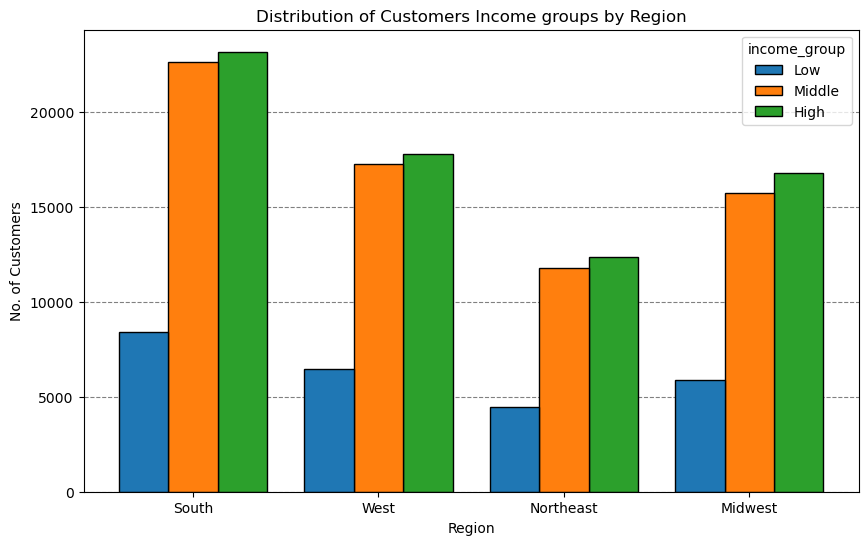

In [71]:
# HGistogram shows the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

In [72]:
# Check above graph using crosstab
pd.crosstab(user_sample['income_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
income_group,,,,
High,16756,12369,23156,17799
Low,5891,4440,8403,6458
Middle,15729,11772,22634,17224


## 8.1.2. Age Groups

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


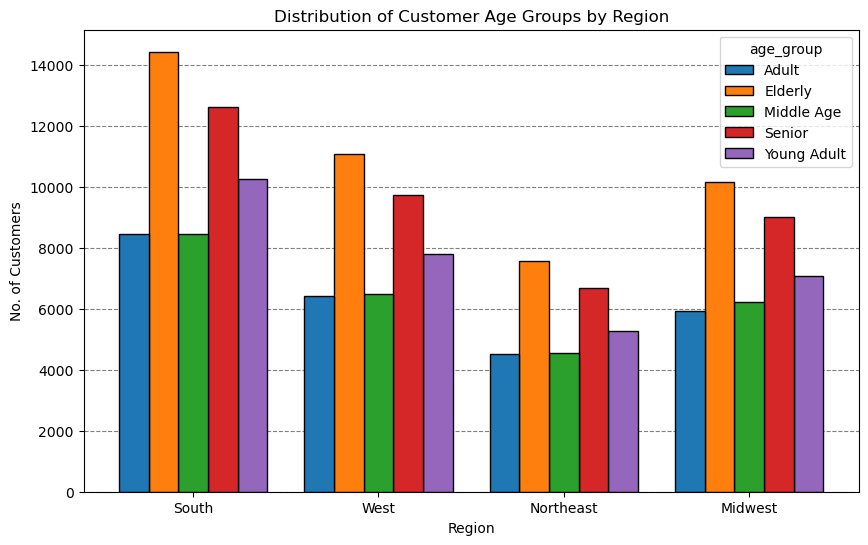

In [73]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

In [74]:
# Check above graph using crosstab
pd.crosstab(user_sample['age_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
age_group,,,,
Adult,5917,4510,8439,6418
Elderly,10169,7580,14433,11068
Middle Age,6221,4545,8445,6486
Senior,9007,6685,12609,9723
Young Adult,7062,5261,10267,7786


## 8.1.3. Dependents

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


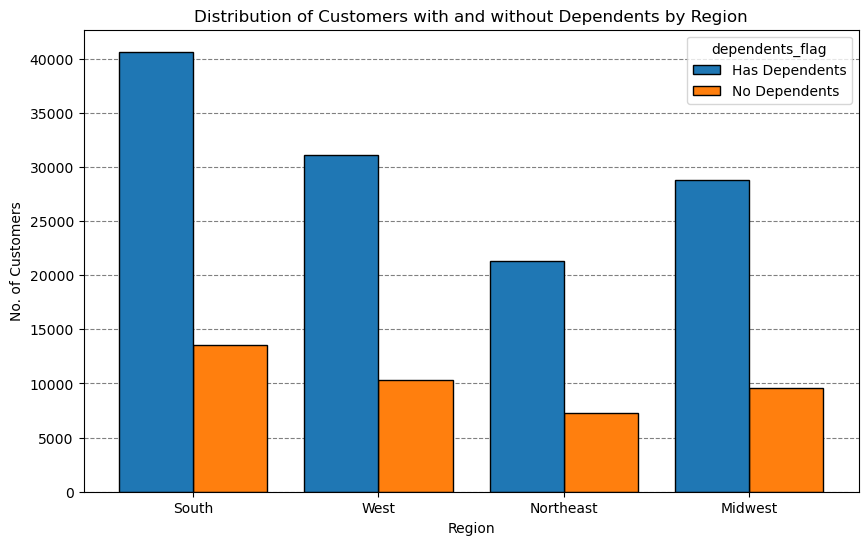

In [75]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='dependents_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependents by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_dependents_by_region.png'), bbox_inches = 'tight')
plt.show()

In [76]:
# Check above graph using crosstab
pd.crosstab(user_sample['dependents_flag'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
dependents_flag,,,,
Has Dependents,28810,21326,40656,31112
No Dependents,9566,7255,13537,10369


## 8.2. Profiles by Department Sales

## 8.2.1. Income Groups

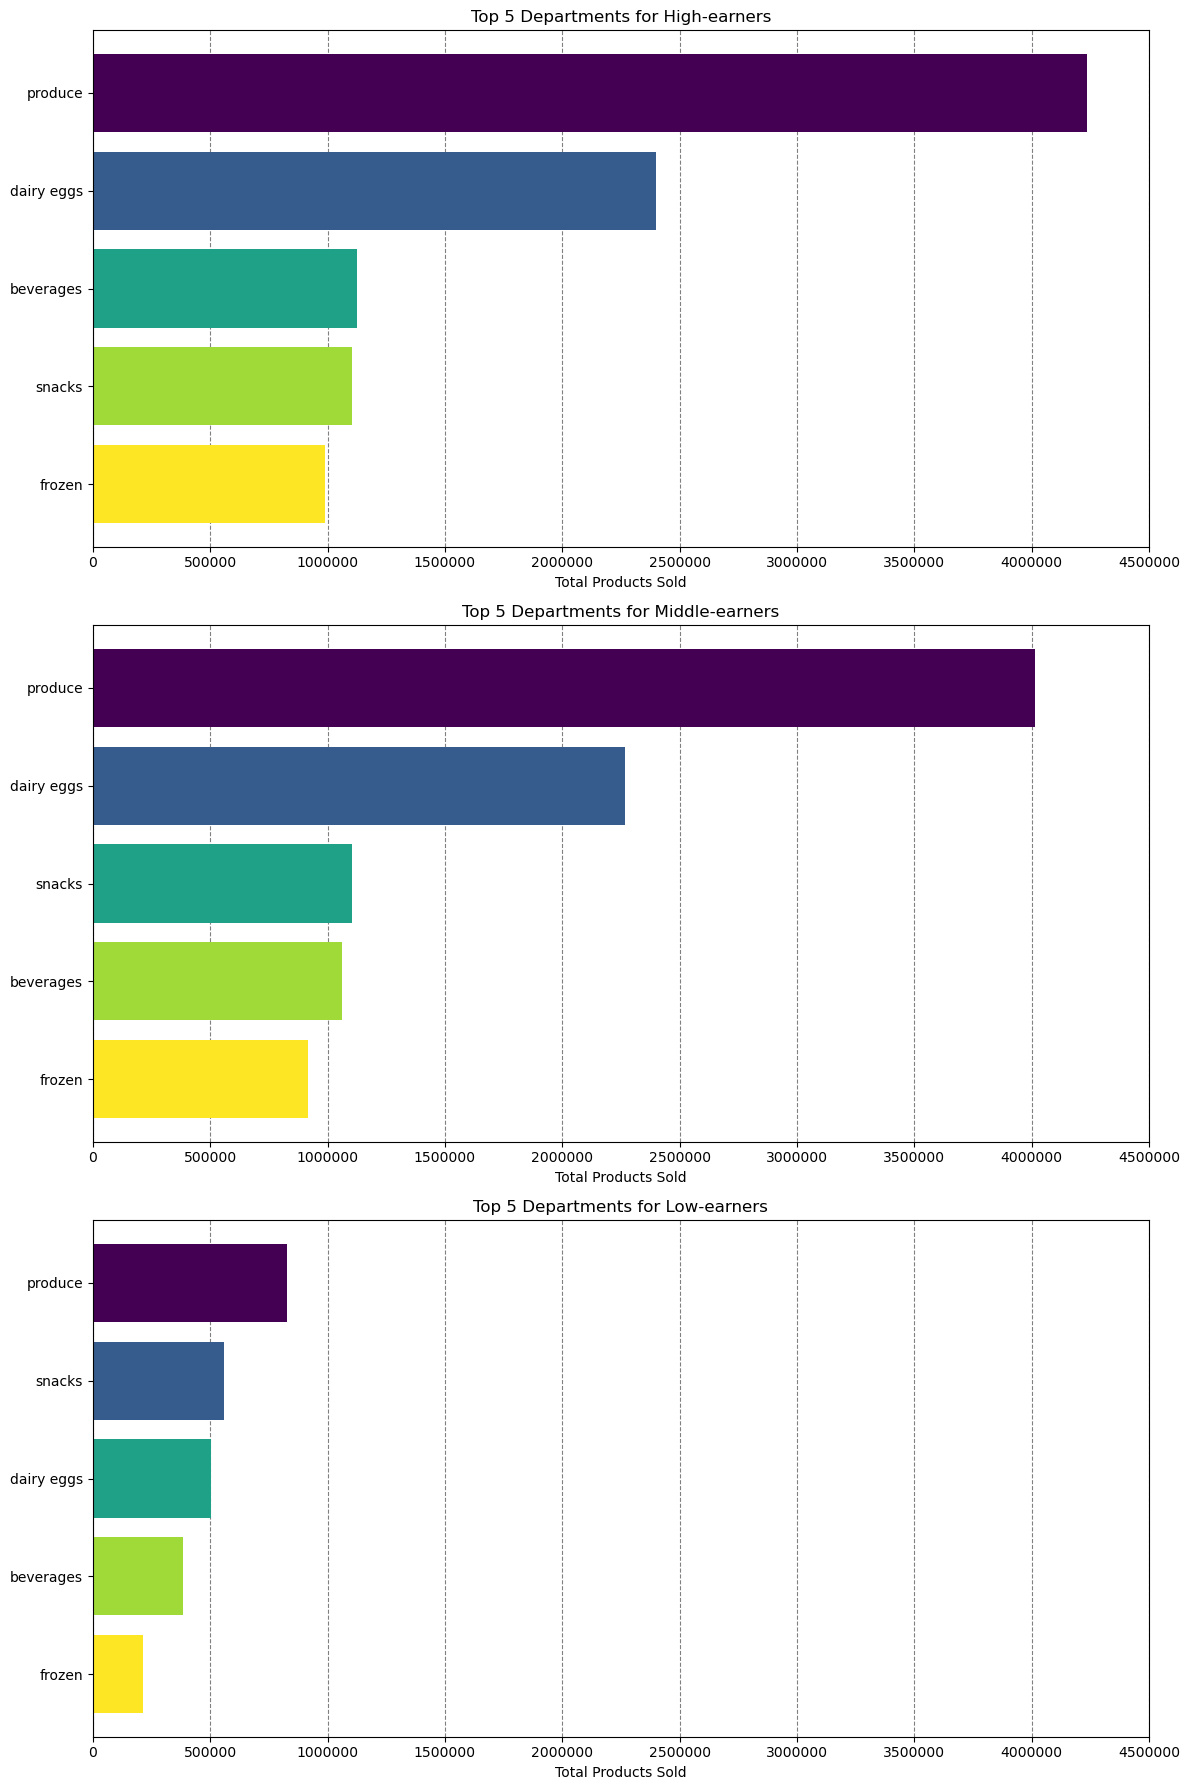

In [77]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = full_data.groupby(['income_group', 'department']).size().reset_index(name='counts')
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = plt.cm.viridis(np.linspace(0, 2, 8))  # Sets colour palette

# Define the desired order of income groups
desired_order = ['High', 'Middle', 'Low']

# Iterate over each income group and create a horizontal bar chart
for i, income_group in enumerate(desired_order):
    income_data = income_department_counts[income_department_counts['income_group'] == income_group].head(5)
    ax = axs[i]
    ax.barh(income_data['department'], income_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {income_group}-earners')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 4500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_income_group.png'), bbox_inches = 'tight')
plt.show()

Not surprisingly considering the prices of fresh foods, after "produce" the next category that low-earners buy from is "snacks" and high and mid income earners buy more "dairy/eggs" 

## 8.2.2. Age Groups

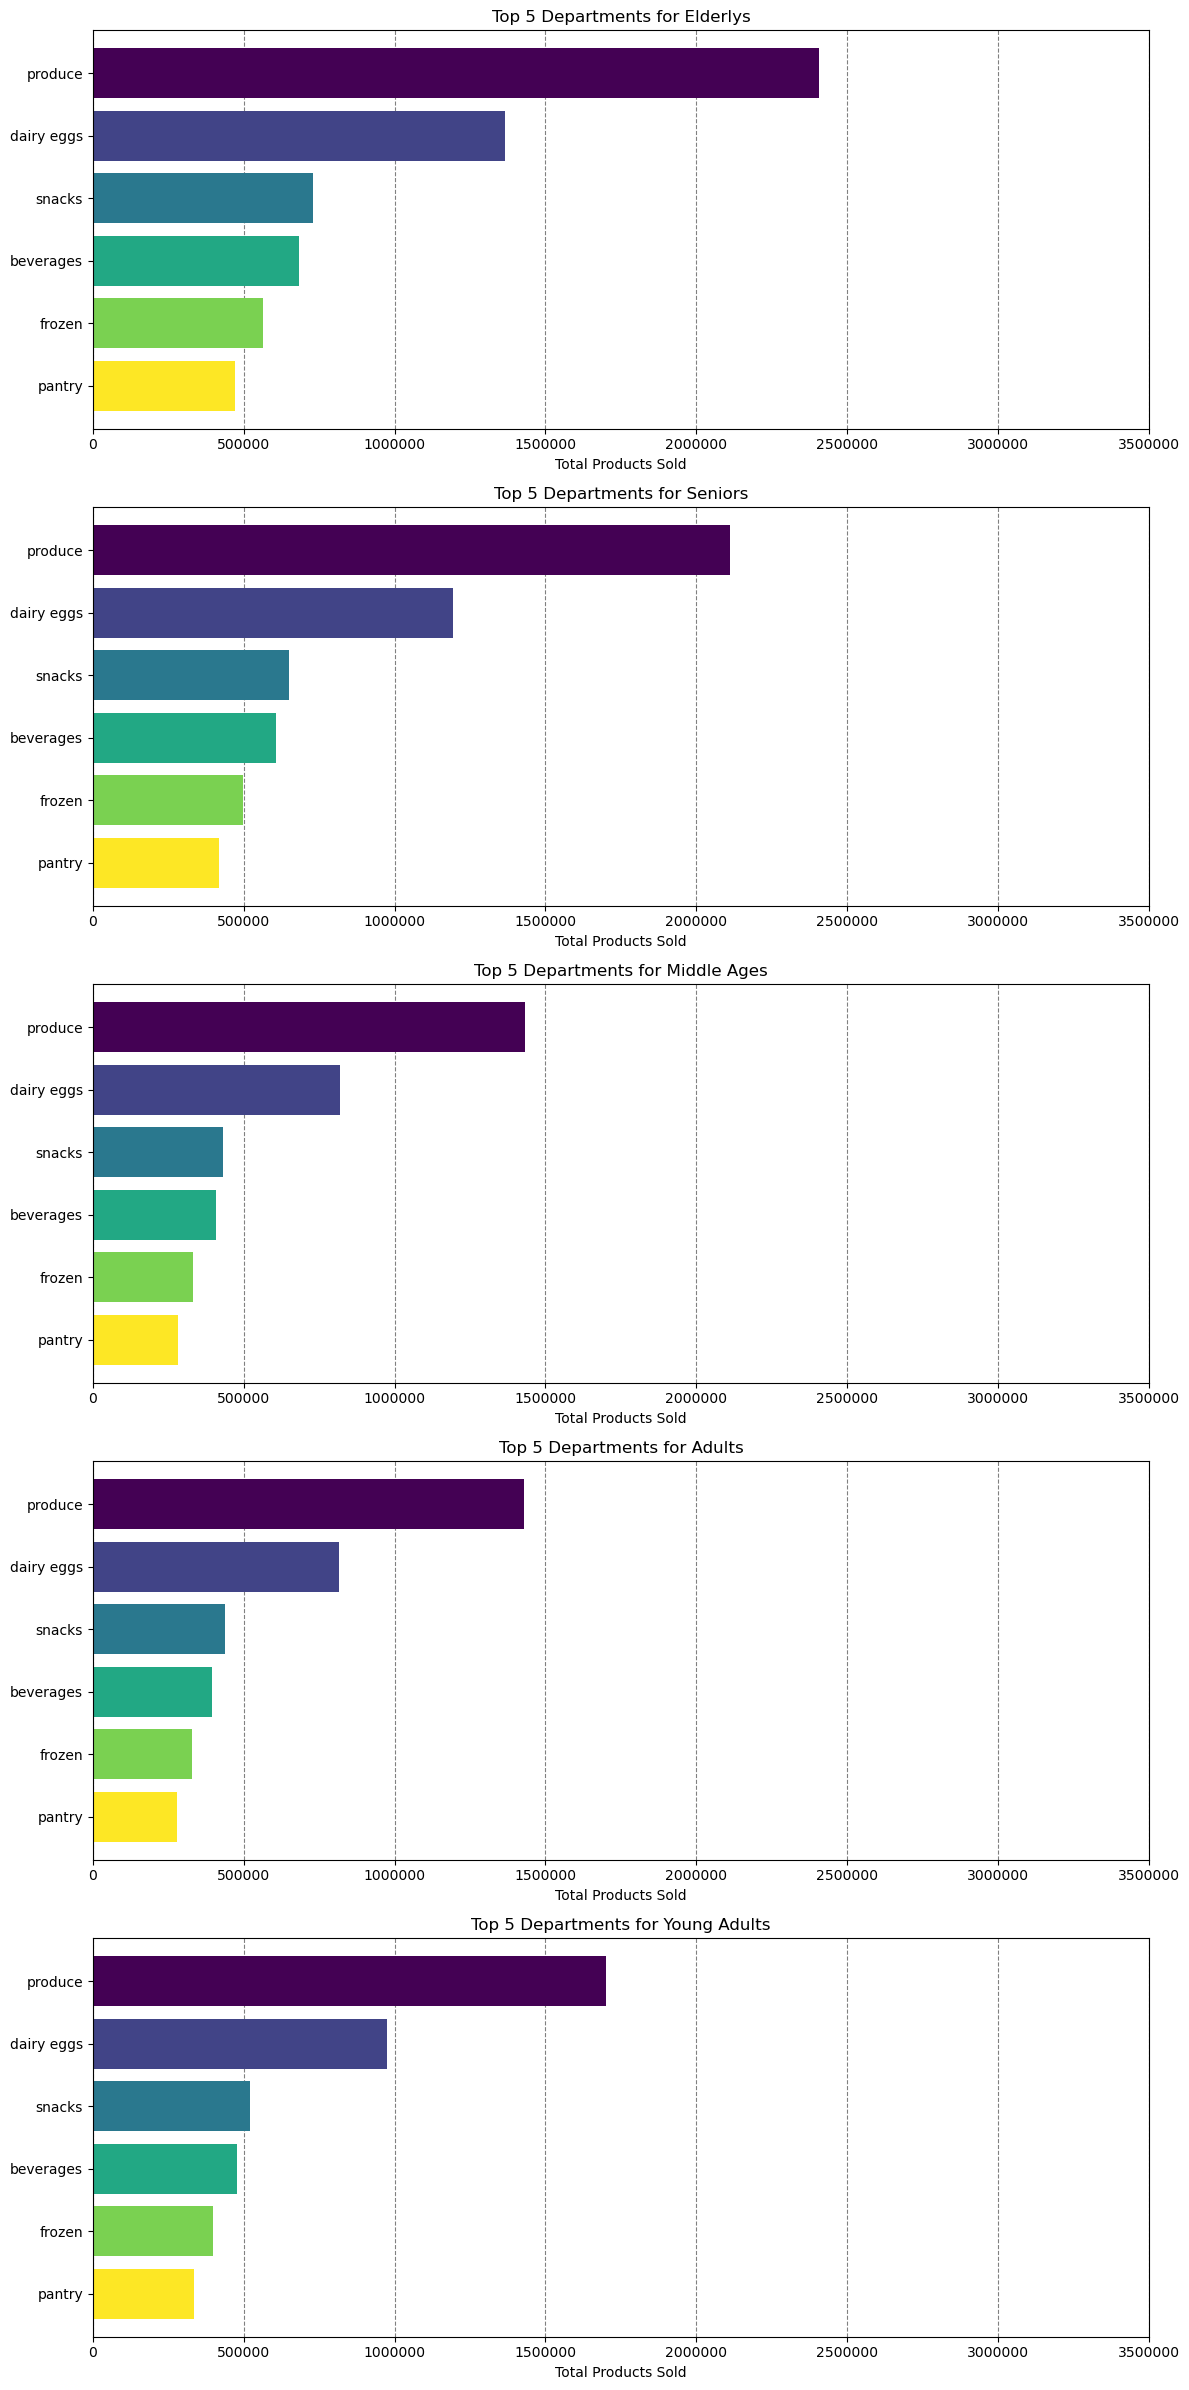

In [78]:
# Group by age_group and department, count occurrences, and sort
age_department_counts = full_data.groupby(['age_group', 'department']).size().reset_index(name='counts')
age_department_counts.sort_values(by=['age_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(5, 1, figsize=(12, 24))
colors = plt.cm.viridis(np.linspace(0, 1, 6))  # Sets colour palette

# Define the desired order of age groups
desired_age_order = ['Elderly', 'Senior', 'Middle Age', 'Adult', 'Young Adult']

# Iterate over each age group and create a horizontal bar chart
for i, age_group in enumerate(desired_age_order):
    age_data = age_department_counts[age_department_counts['age_group'] == age_group].head(6)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {age_group}s')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 3500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_age_group.png'), bbox_inches = 'tight')
plt.show()

 Different age groups don't show a difference in the order of the departments they purchase the most from, but there are some differences between the differences.

## 8.2.3. Dependents

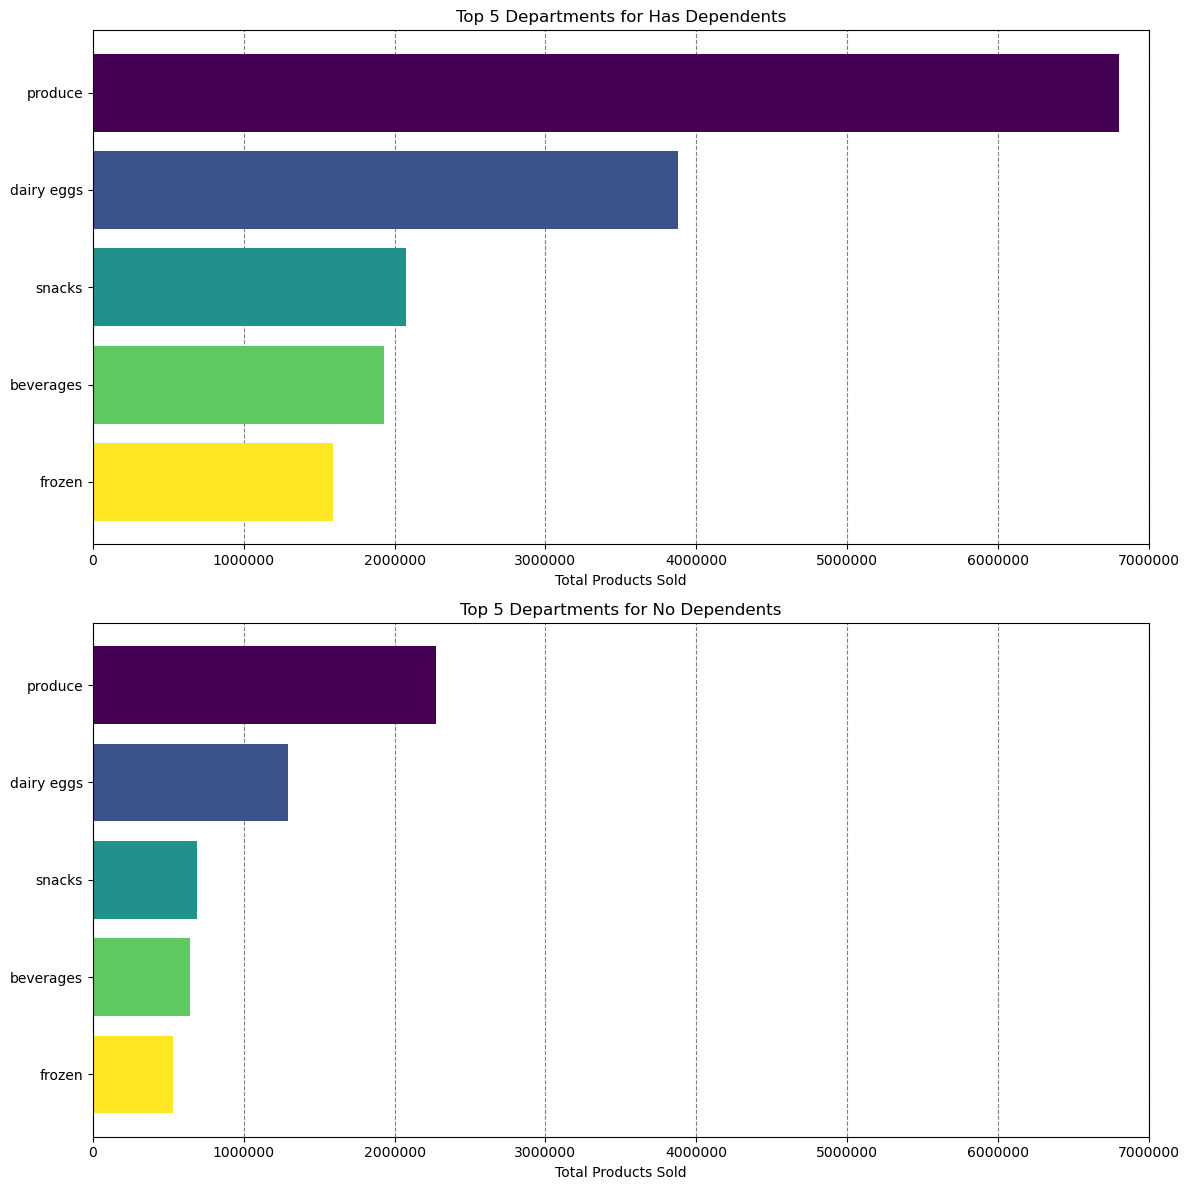

In [79]:
# Group by dependents_flag and department, count occurrences, and sort
dependents_department_counts = full_data.groupby(['dependents_flag', 'department']).size().reset_index(name='counts')
dependents_department_counts.sort_values(by=['dependents_flag', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
dependents_order = ['Has Dependents', 'No Dependents']

# Iterate over both dependants_flags and create a horizontal bar chart
for i, dependents_status in enumerate(dependents_order):
    dependents_data = dependents_department_counts[dependents_department_counts['dependents_flag'] == dependents_status].head(5)
    ax = axs[i]
    ax.barh(dependents_data['department'], dependents_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {dependents_status}')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 7000000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_dependents.png'), bbox_inches = 'tight')
plt.show()

 Top departments are consistent between groups, those with no dependents unsurprisingly buy fewer groceries

# 9. Visualisations

Visualizations have been exported

# 10. Export Final Data Set

In [80]:
full_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_full_data.pkl'))

# Additional Analysis

Top 10 departments for instacart

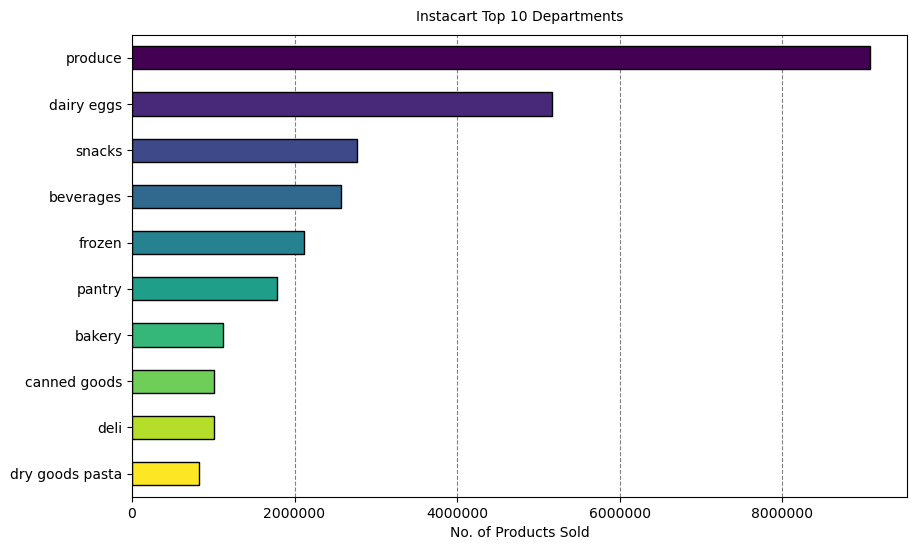

In [81]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

full_data['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, 
                                                                                        zorder = 2, 
                                                                                        edgecolor = 'black')
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Instacart_department_sales.png'), bbox_inches = 'tight')

In [82]:
# Frequency count
full_data['department'].value_counts(dropna=False)

department
produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

## Ordering habits based on loyalty status

In [83]:
# Compute average order_total
loyalty_order_total = orders_subset.groupby('loyalty_flag')['order_total'].mean().sort_values(ascending = False).reset_index()

In [84]:
# Check
loyalty_order_total

,loyalty_flag,order_total
0,Regular customer,79.666699
1,Loyal customer,77.888122
2,New customer,77.014624


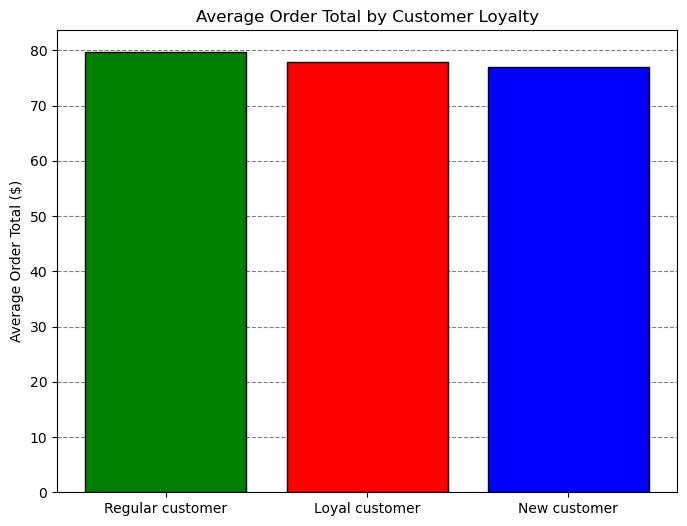

In [85]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))
colors = ['green', 'red', 'blue']

# Plot bars
bars = plt.bar(loyalty_order_total['loyalty_flag'], loyalty_order_total['order_total'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_loyalty.png'), bbox_inches = 'tight')

In [86]:
# Average price of products purchased
product_avg_cost = full_data.groupby('loyalty_flag')['prices'].mean().sort_values(ascending = False).reset_index()

In [87]:
# Check
product_avg_cost

,loyalty_flag,prices
0,New customer,7.801665
1,Regular customer,7.798262
2,Loyal customer,7.773575


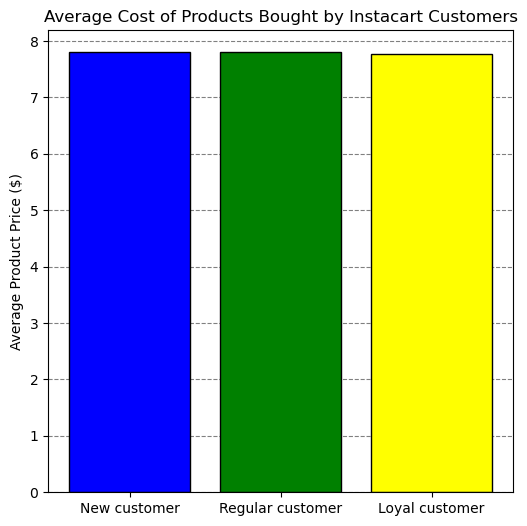

In [88]:
# Set up formatting and colours
plt.figure(figsize=(6, 6))
colors = ['blue', 'green', 'yellow']

# Plot bars
bars = plt.bar(product_avg_cost['loyalty_flag'], product_avg_cost['prices'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Cost of Products Bought by Instacart Customers")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Product Price ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_product_price_by_loyalty.png'), bbox_inches = 'tight')

Total product orders:

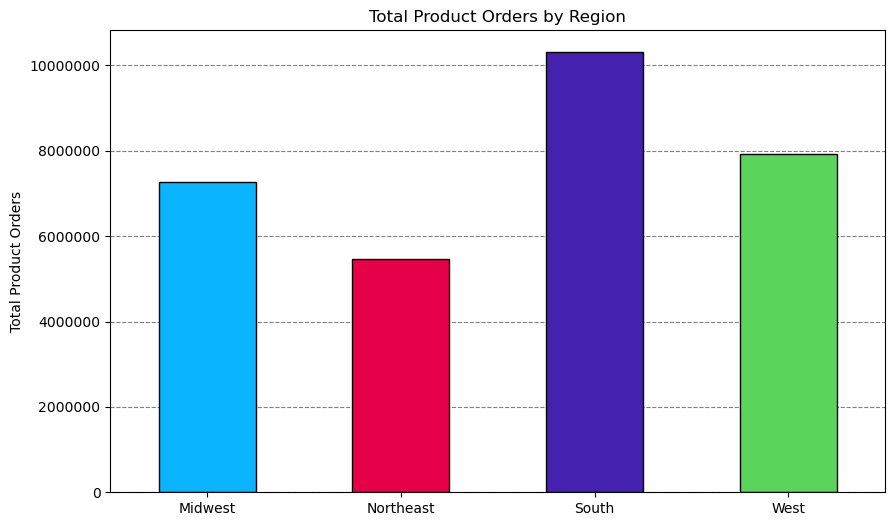

In [89]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
full_data['region'].value_counts().sort_index().plot.bar(color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_total_orders_by_region.png'), bbox_inches = 'tight')

In [90]:
# Average order_total
region_avg_order_total = orders_subset.groupby('region')['order_total'].mean().sort_values(ascending = False).reset_index()

In [91]:
# Check
region_avg_order_total

,region,order_total
0,West,78.789436
1,Northeast,78.670088
2,South,78.627138
3,Midwest,78.588492


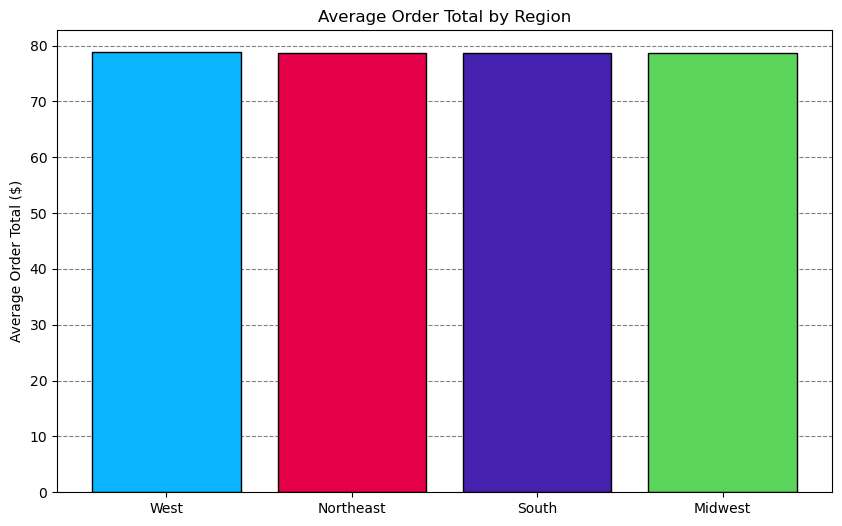

In [92]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(region_avg_order_total['region'], 
               region_avg_order_total['order_total'], 
               color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
               edgecolor='black', 
               zorder=2, 
               alpha = 1)
plt.title("Average Order Total by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_region.png'), bbox_inches = 'tight')

# Differences in ordering habits of different customer profiles

In [93]:
# Income groups by the mean of the order_total - multilevel index
sorted_df = aggregations_by_income_cat.sort_values(by=('order_total', 'mean'), ascending=False)

In [94]:
# Check
sorted_df

days_since_prior_order                  order_total             \
                                min       mean   max         min       mean   
income_group                                                                  
High                            0.0  10.260991  30.0         1.0  83.757004   
Middle                          0.0  10.289999  30.0         1.0  81.930075   
Low                             0.0  11.070341  30.0         1.0  52.673028   

                      
                 max  
income_group          
High          1092.2  
Middle         852.5  
Low            875.0

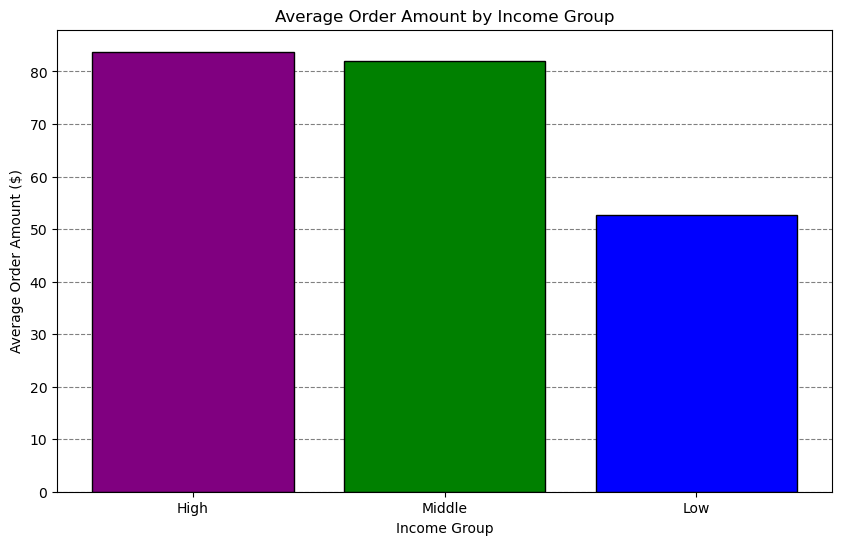

In [103]:
# Make bar chart for average order total
plt.figure(figsize=(10, 6))
plt.bar(sorted_df.index, sorted_df['order_total', 'mean'], color=['purple', 'green', 'blue'], zorder=2, edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Average Order Amount ($)')
plt.title('Average Order Amount by Income Group')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_amount_by_income.png'), bbox_inches = 'tight')

### Creating Frequency_flag, merging it in user_sample and then generating cross-tabulation

In [96]:
# Calculate median_days_between_orders for each user
median_days_between_orders = ords_prods_all_in.groupby('user_id')['days_since_prior_order'].median().reset_index(name='median_days_between_orders')

# Merge median_days_between_orders with user_sample DataFrame
user_sample = pd.merge(user_sample, median_days_between_orders, on='user_id', how='left')

# Define frequency_flag based on median_days_between_orders
conditions = [
    (user_sample['median_days_between_orders'] <= 10),
    (user_sample['median_days_between_orders'] > 10) & (user_sample['median_days_between_orders'] <= 20),
    (user_sample['median_days_between_orders'] > 20)
]
choices = ['High', 'Medium', 'Low']

user_sample['frequency_flag'] = pd.cut(user_sample['median_days_between_orders'], bins=[-float('inf'), 10, 20, float('inf')], labels=['High', 'Medium', 'Low'])

# Generate cross-tabulation
crosstab1 = pd.crosstab(user_sample['income_group'], user_sample['frequency_flag'], dropna=False)

print(crosstab1)

frequency_flag   High  Medium    Low
income_group                        
High            33487   21476  15117
Low             10630    7860   6702
Middle          31812   20702  14845


In [97]:
# Check
crosstab1

frequency_flag,High,Medium,Low
income_group,,,
High,33487,21476,15117
Low,10630,7860,6702
Middle,31812,20702,14845


In [98]:
# Normalise
crosstab1_norm = crosstab1.div(crosstab1.sum(axis=1), axis = 0) * 100
# Check
crosstab1_norm

frequency_flag,High,Medium,Low
income_group,,,
High,47.783961,30.644977,21.571062
Low,42.195935,31.200381,26.603684
Middle,47.227542,30.733829,22.038629


<Figure size 800x1000 with 0 Axes>

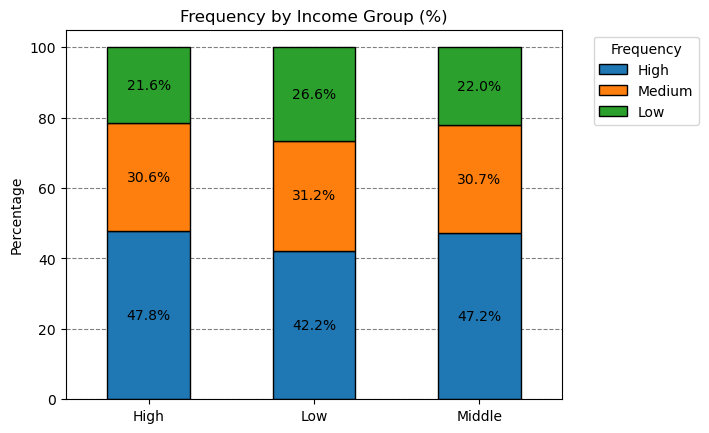

In [99]:
# Graph
plt.figure(figsize=(8, 10)) 
ax = crosstab1_norm.plot(kind='bar', stacked=True, zorder=2, edgecolor='black')

# To show percentages on each section:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'  # Format as percentage
    ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center')

plt.title('Frequency by Income Group (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.legend(title='Frequency',loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_customer_frequency_by_income.png'), bbox_inches = 'tight')

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


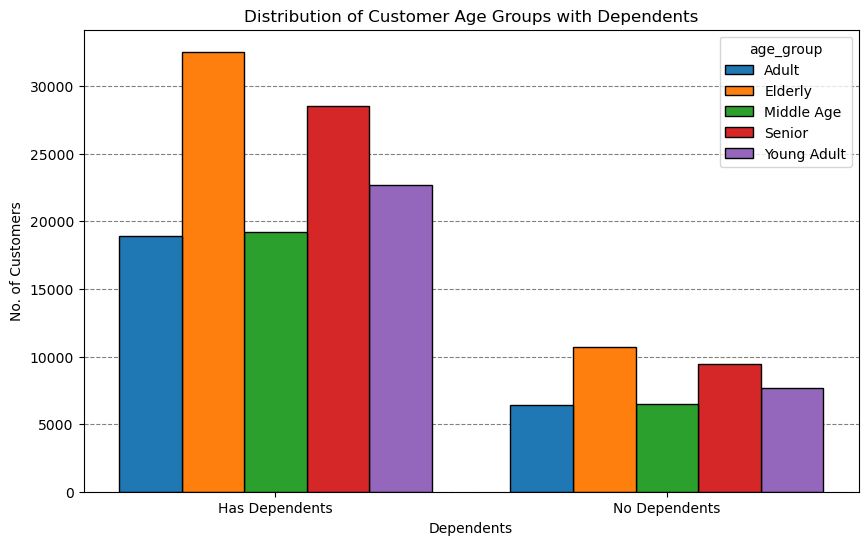

In [101]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='dependents_flag', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups with Dependents')
plt.ylabel('No. of Customers')
plt.xlabel('Dependents')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_dependents.png'), bbox_inches = 'tight')
plt.show()

In [102]:
# Check above graph using crosstab
pd.crosstab(user_sample['age_group'], user_sample['dependents_flag'], dropna = False)

dependents_flag,Has Dependents,No Dependents
age_group,,
Adult,18899,6385
Elderly,32547,10703
Middle Age,19219,6478
Senior,28565,9459
Young Adult,22674,7702


C:\Users\tiffk\AppData\Local\Temp\ipykernel_2748\3137128952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_parents['group'] = 'Young Parents'
C:\Users\tiffk\AppData\Local\Temp\ipykernel_2748\3137128952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_adults['group'] = 'Single Adults'
C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

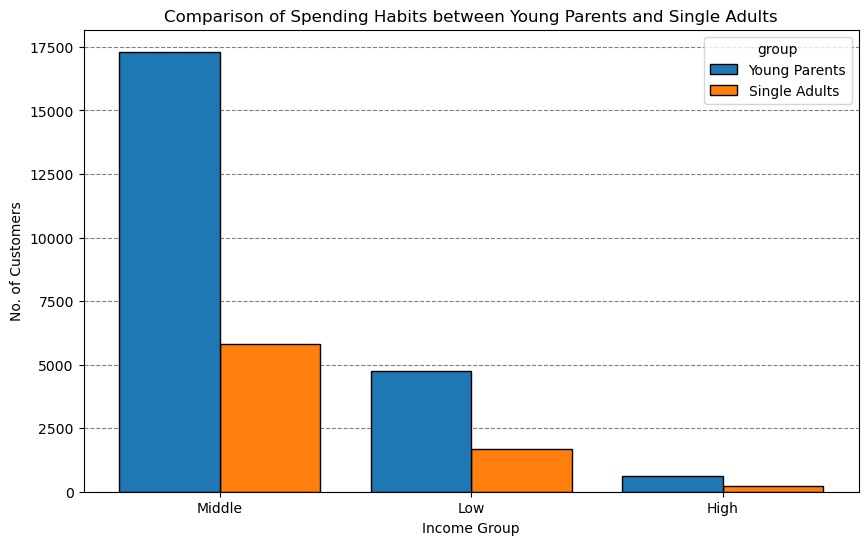

In [111]:

# Filter data for young parents and single adults
young_parents = user_sample[(user_sample['dependents_flag'] == 'Has Dependents') & (user_sample['age_group'] == 'Young Adult')]
single_adults = user_sample[(user_sample['dependents_flag'] == 'No Dependents') & (user_sample['age_group'] == 'Young Adult')]

# Combine filtered data and add a 'group' column
young_parents['group'] = 'Young Parents'
single_adults['group'] = 'Single Adults'
combined_data = pd.concat([young_parents, single_adults])

plt.figure(figsize=(10, 6))
# Plot the histogram bars with group breakdown
sns.histplot(data=combined_data, x='income_group', hue='group', multiple='dodge', shrink=.8, alpha=1, element='bars', stat='count', common_norm=False)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Comparison of Spending Habits between Young Parents and Single Adults')
plt.ylabel('No. of Customers')
plt.xlabel('Income Group')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'young_parents_vs_single_adults_income_group.png'), bbox_inches='tight')
plt.show()


In [125]:
# Create a pivot table for the crosstab
pivot_table = pd.pivot_table(user_sample,
                             values='user_id',  # Assuming 'user_id' is a unique identifier
                             index=['age_group'],
                             columns=['income_group', 'dependents_flag'],
                             aggfunc='count',  # Count the occurrences
                             fill_value=0,  # Replace NaN with 0
                             dropna=False)  # Include missing values

# Display the pivot table
pivot_table


income_group              High                          Low                \
dependents_flag Has Dependents No Dependents Has Dependents No Dependents   
age_group                                                                   
Adult                      532           181           3989          1333   
Elderly                  21391          7084           3980          1298   
Middle Age               11366          3870           2562           868   
Senior                   18622          6184           3583          1182   
Young Adult                634           216           4730          1667   

income_group            Middle                
dependents_flag Has Dependents No Dependents  
age_group                                     
Adult                    14378          4871  
Elderly                   7176          2321  
Middle Age                5291          1740  
Senior                    6360          2093  
Young Adult              17310          5819

C:\Users\tiffk\AppData\Local\Temp\ipykernel_2748\3137128952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_parents['group'] = 'Young Parents'
C:\Users\tiffk\AppData\Local\Temp\ipykernel_2748\3137128952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_adults['group'] = 'Single Adults'
C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

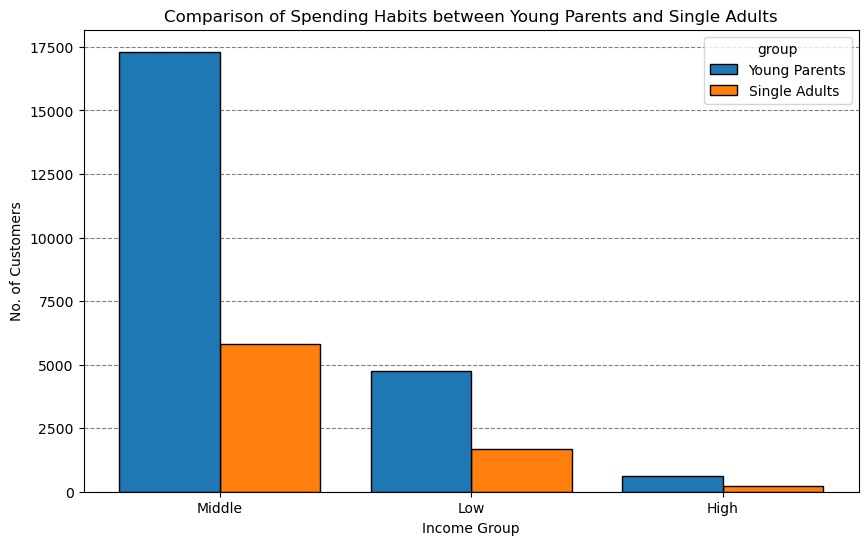

In [111]:

# Filter data for young parents and single adults
young_parents = user_sample[(user_sample['dependents_flag'] == 'Has Dependents') & (user_sample['age_group'] == 'Young Adult')]
single_adults = user_sample[(user_sample['dependents_flag'] == 'No Dependents') & (user_sample['age_group'] == 'Young Adult')]

# Combine filtered data and add a 'group' column
young_parents['group'] = 'Young Parents'
single_adults['group'] = 'Single Adults'
combined_data = pd.concat([young_parents, single_adults])

plt.figure(figsize=(10, 6))
# Plot the histogram bars with group breakdown
sns.histplot(data=combined_data, x='income_group', hue='group', multiple='dodge', shrink=.8, alpha=1, element='bars', stat='count', common_norm=False)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Comparison of Spending Habits between Young Parents and Single Adults')
plt.ylabel('No. of Customers')
plt.xlabel('Income Group')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'young_parents_vs_single_adults_income_group.png'), bbox_inches='tight')
plt.show()


In [126]:
# Create a pivot table for the crosstab
pivot_table = pd.pivot_table(user_sample,
                             values='user_id',  # Assuming 'user_id' is a unique identifier
                             index=['age_group'],
                             columns=['income_group', 'frequency_flag'],
                             aggfunc='count',  # Count the occurrences
                             fill_value=0,  # Replace NaN with 0
                             dropna=False)  # Include missing values

# Display the pivot table
pivot_table

income_group     High                Low              Middle             
frequency_flag   High Medium   Low  High Medium   Low   High Medium   Low
age_group                                                                
Adult             364    217   132  2178   1713  1431   9176   5939  4134
Elderly         13627   8763  6085  2282   1612  1384   4374   2964  2159
Middle Age       7334   4579  3323  1436   1056   938   3309   2086  1636
Senior          11744   7655  5407  2018   1474  1273   3877   2638  1938
Young Adult       418    262   170  2716   2005  1676  11076   7075  4978

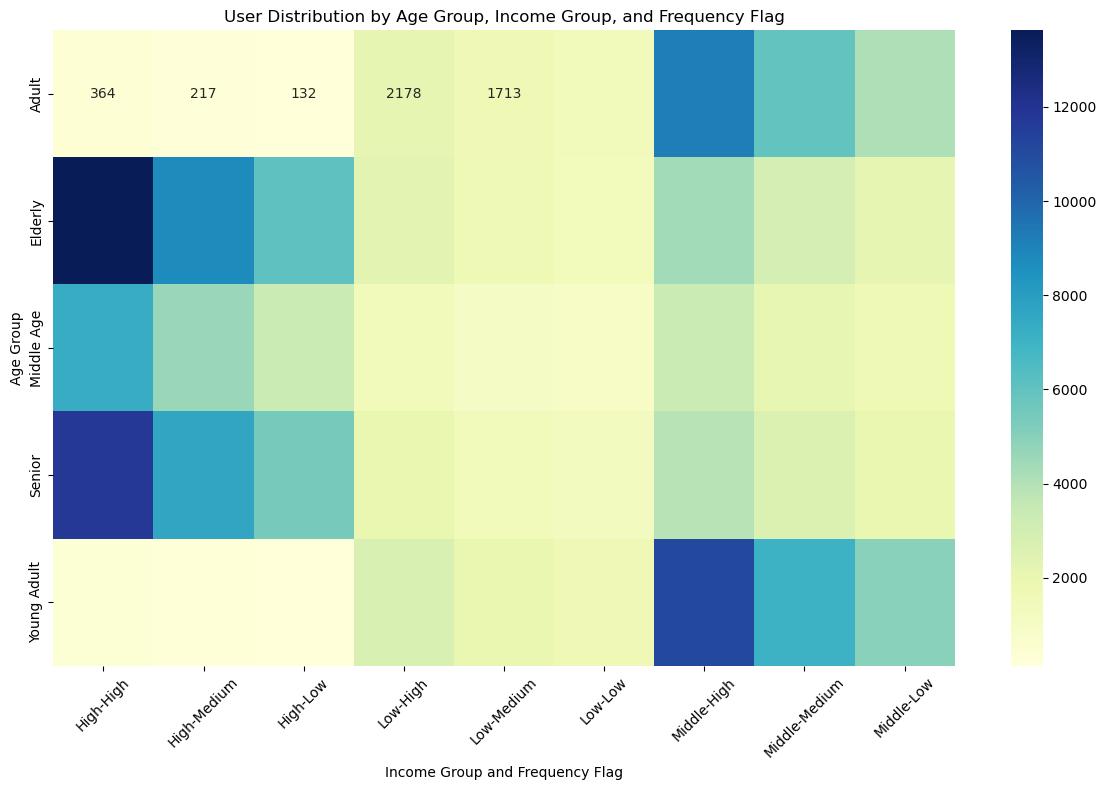

In [128]:
plt.figure(figsize=(12, 8))
# Plot heatmap
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('User Distribution by Age Group, Income Group, and Frequency Flag')
plt.xlabel('Income Group and Frequency Flag')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, 'user_distribution_heatmap.png'), bbox_inches='tight')
plt.show()


In [133]:
# Create a pivot table for the crosstab
pivot_table = pd.pivot_table(user_sample,
                             values='user_id',  # Assuming 'user_id' is a unique identifier
                             index=['age_group'],
                             columns=['income_group', 'frequency_flag'],
                             aggfunc='count',  # Count the occurrences
                             fill_value=0,  # Replace NaN with 0
                             dropna=False)  # Include missing values

# Display the pivot table
print(pivot_table)


income_group     High                Low              Middle             
frequency_flag   High Medium   Low  High Medium   Low   High Medium   Low
age_group                                                                
Adult             364    217   132  2178   1713  1431   9176   5939  4134
Elderly         13627   8763  6085  2282   1612  1384   4374   2964  2159
Middle Age       7334   4579  3323  1436   1056   938   3309   2086  1636
Senior          11744   7655  5407  2018   1474  1273   3877   2638  1938
Young Adult       418    262   170  2716   2005  1676  11076   7075  4978


In [131]:
# Reset the index to ensure age_group is a column
pivot_table_reset = pivot_table.reset_index()

# Flatten the multi-index columns
pivot_table_reset.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in pivot_table_reset.columns.values]

# Display the flattened pivot table
print(pivot_table_reset)


    age_group_  High_High  High_Medium  High_Low  Low_High  Low_Medium  \
0        Adult        364          217       132      2178        1713   
1      Elderly      13627         8763      6085      2282        1612   
2   Middle Age       7334         4579      3323      1436        1056   
3       Senior      11744         7655      5407      2018        1474   
4  Young Adult        418          262       170      2716        2005   

   Low_Low  Middle_High  Middle_Medium  Middle_Low  
0     1431         9176           5939        4134  
1     1384         4374           2964        2159  
2      938         3309           2086        1636  
3     1273         3877           2638        1938  
4     1676        11076           7075        4978  


In [137]:
ords_prods_all_in.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,user_mean_product_price,median_days_between_orders,age,n_dependants,income
count,3.095969e+07,3.095969e+07,3.095969e+07,3.095969e+07,3.095969e+07,3.095969e+07,3.095969e+07,3.095969e+07,3.095969e+07,2.929868e+07,3.095969e+07,3.095969e+07,3.095969e+07,3.095969e+07,3.095969e+07,3.095969e+07,3.095969e+07,3.095969e+07
mean,2.559888e+04,7.118329e+01,9.921408e+00,7.790590e+00,1.710319e+06,1.029277e+05,1.783443e+01,2.741393e+00,1.341098e+01,1.081017e+01,8.363092e+00,6.060978e-01,3.442621e+01,7.790590e+00,9.956911e+00,4.946803e+01,1.501815e+00,9.965502e+04
std,1.408194e+04,3.822249e+01,6.282473e+00,4.240595e+00,9.873788e+05,5.947076e+04,1.763453e+01,2.089267e+00,4.248863e+00,8.578530e+00,7.135442e+00,4.886136e-01,2.489502e+01,7.216754e-01,6.666084e+00,1.848527e+01,1.118898e+00,4.309143e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.554130e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.400000e+01,7.385130e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.728600e+04
50%,2.530000e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710405e+06,1.025850e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.800000e+01,7.812255e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676100e+04
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565206e+06,1.543860e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.800000e+01,8.224106e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.280810e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.011429e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [138]:
ords_prods_all_in.dtypes

product_id                       int32
product_name                    object
aisle_id                         int32
department_id                    int32
prices                         float64
order_id                         int32
user_id                          int32
order_number                     int32
orders_day_of_week               int64
order_hour_of_day                int32
days_since_prior_order         float64
first_order                       bool
add_to_cart_order                int64
reordered                        int64
merge_1                       category
price_range_loc                 object
busiest_days                    object
busiest_period_of_day           object
max_order                        int32
loyalty_flag                    object
user_mean_product_price        float64
spending_flag                   object
median_days_between_orders     float64
frequency_flag                  object
gender                          object
state                    

In [139]:
# Creating a function to assign price categories to products
def price_label(row):
    
    if row["prices"] <= 5:
        return "Low-range product"
    elif (row["prices"] > 5 and row["prices"] <= 15):
        return "Mid-range product"
    elif row["prices"] > 15:
        return "High-range product"
    else: return "More data needed"

In [141]:
# Import ords_prods_merge
df_ords_prods_merge = pd.read_pickle(os.path.join(path, "02 Data", "Prepared Data", "ords_prods_merge.pkl"))

In [142]:
# Creating a function to assign price categories to products
def price_label(row):
    
    if row["prices"] <= 5:
        return "Low-range product"
    elif (row["prices"] > 5 and row["prices"] <= 15):
        return "Mid-range product"
    elif row["prices"] > 15:
        return "High-range product"
    else: return "More data needed"

In [145]:
# Apply function to dataframe
df_ords_prods_merge["price_range"] = df_ords_prods_merge.apply(price_label, axis = 1)

MemoryError: Unable to allocate 3.62 GiB for an array with shape (15, 32399732) and data type object

In [146]:
df_ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,True,10,0,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,False,11,1,both


In [147]:
# Create a pandas Series with float64 data
prices = pd.Series([10.0, 20.0, 30.0], dtype=np.float64)
print(f"Original dtype: {prices.dtype}, memory usage: {prices.memory_usage(deep=True)} bytes")

# Downcast to float32
prices = prices.astype(np.float32)
print(f"Downcast dtype: {prices.dtype}, memory usage: {prices.memory_usage(deep=True)} bytes")


Original dtype: float64, memory usage: 156 bytes
Downcast dtype: float32, memory usage: 144 bytes


In [150]:
# Change some int64 datatypes to smaller types to aid memory
df_ords_prods_merge = df_ords_prods_merge.astype({'prices' : 'int32'})

MemoryError: Unable to allocate 247. MiB for an array with shape (32399732,) and data type object